In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load Superstore CSV
df = pd.read_csv("../data/SampleSuperstore.csv")

# Preview
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Group daily sales
daily_sales = df.groupby(df['Order Date'].dt.date)['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']  # Prophet format

# Check result
daily_sales.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [4]:
model = Prophet()
model.fit(daily_sales)

# Forecast next 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

18:07:15 - cmdstanpy - INFO - Chain [1] start processing
18:07:16 - cmdstanpy - INFO - Chain [1] done processing


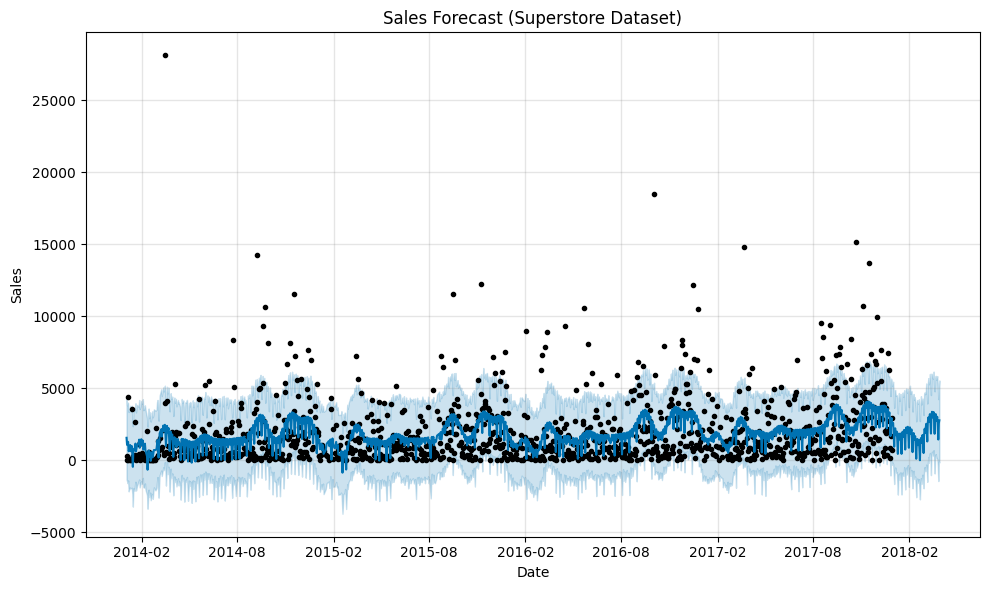

In [8]:
fig1 = model.plot(forecast)
plt.title("Sales Forecast (Superstore Dataset)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
fig1.savefig("../images/forecast_plot.png")
plt.show()

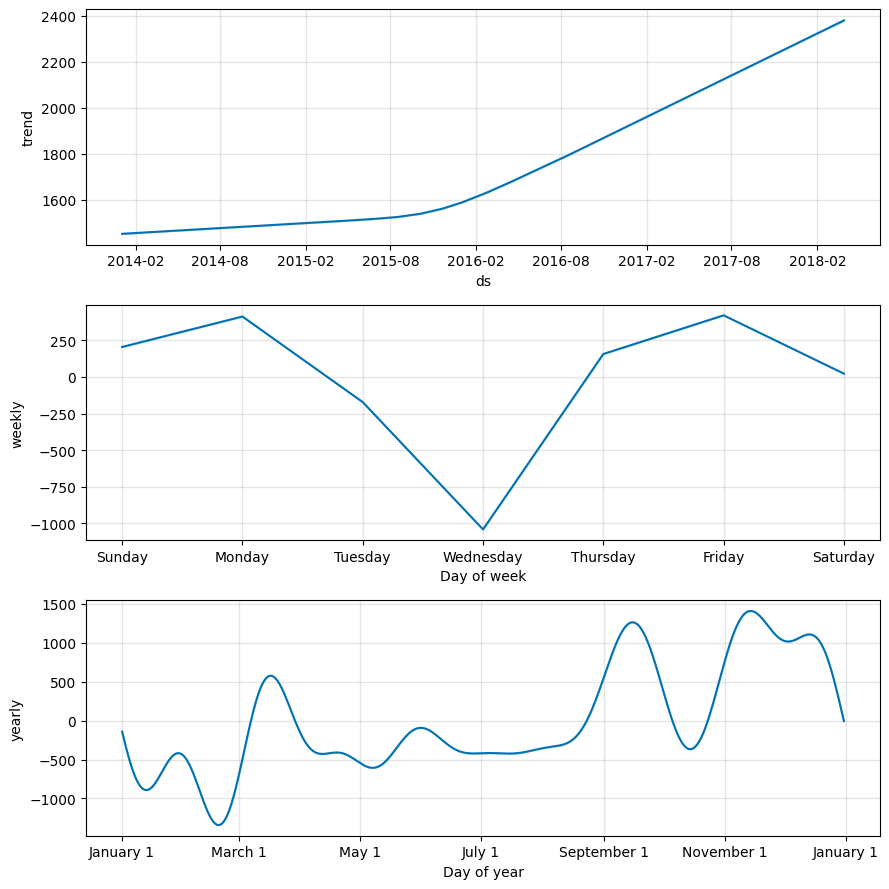

In [9]:
fig2 = model.plot_components(forecast)
plt.tight_layout()
fig2.savefig("../images/forecast_components.png")
plt.show()